In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']

# read the dataset
df = pd.read_csv(r'C:\Users\home\Desktop\Machine Learning\datasets\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.shape

(400, 26)

In [12]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)

In [14]:
# drop the NaN
df = df.dropna(axis=0, how="any")

In [48]:
# print total samples
print("Total samples:", len(df))

# print 4-rows and 6-columns
print("Partial data\n", df.iloc[0:4, 0:6])

Total samples: 158
Partial data
     id   age    bp     sg   al   su
3    3  48.0  70.0  1.005  4.0  0.0
9    9  53.0  90.0  1.020  2.0  0.0
11  11  63.0  70.0  1.010  3.0  0.0
14  14  68.0  80.0  1.010  3.0  2.0


In [17]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [18]:
targets = df['classification'].astype('category')

# save target-values as color for plotting
# red: disease,  green: no disease

label_color = ['red' if i=='ckd' else 'green' for i in targets]

print(label_color[0:3], label_color[-3:-1])

['red', 'red', 'red'] ['green', 'green']


In [19]:
# check the categorical features
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [20]:
# how many categorical features
(df.dtypes == object).sum()

14

In [22]:
# list of categorical features
categorical_ = ['rbc', 'pc', 'pcc',   'ba', 'htn',
                'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

In [23]:
# drop the classification column
#df = df.drop('classification', axis=1)

# drop the "categorical" features
# drop using 'inplace' which is equivalent to df = df.drop()
df.drop(labels=categorical_, axis=1, inplace=True)

# print("Partial data\n", df.iloc[0:4, 0:6]) # print partial data
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7
11,11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6
20,20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2


In [55]:
# usage of dimensionality reduction technique,

# Dimensionality reduction is used to reduce the complexity of data.
# It allows faster data processing, but reduces the accuracy of the model.
# It can be used as noise reduction process.
# It can be used as ‘preprocessor of the data’ for the supervised leaning 
# process i.e. regression and classification.

#### PCA limitations

PCA is very sensitive to scaling operations, more specifically it 
maximizes variability based on the variances of the features.

Due to this reason, it gives more weight to ‘high variance features i.e. 
high-variance-feature will dominate the overall performance.

To avoid this problem, it is better to normalize the features before 
applying the PCA model

but first we will try with no normalization

In [24]:
pca = PCA(n_components=2)

pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
# transformed data
arr_T = pca.transform(df) 

arr_T

array([[-1.77312665e+03,  2.60208569e+02],
       [ 3.62636889e+03,  1.92637964e+02],
       [-3.97189750e+03,  3.70334948e+02],
       [ 2.52675710e+03,  2.26712040e+02],
       [ 7.26978636e+02,  2.61635145e+02],
       [-1.57322812e+03,  2.61447447e+02],
       [ 1.12715778e+03,  2.65616802e+02],
       [ 1.04254049e+04,  6.10699003e+01],
       [-1.27293910e+03,  2.76144448e+02],
       [ 6.12594751e+03,  1.35381868e+02],
       [-2.07366973e+03,  2.18442271e+02],
       [-2.27361085e+03,  2.27810997e+02],
       [-4.67367574e+03,  2.41164409e+02],
       [ 1.32646536e+03,  1.98868039e+02],
       [ 4.02594082e+03,  1.39121521e+02],
       [-2.87344742e+03,  2.35518540e+02],
       [-1.47319228e+03,  2.48678186e+02],
       [ 6.72522424e+03,  7.24726215e+01],
       [-3.47359359e+03,  2.35274167e+02],
       [ 7.82533101e+03,  8.44065396e+01],
       [-7.44062071e+01,  1.44417644e+02],
       [ 2.02514710e+03,  8.67713191e+01],
       [ 6.72560294e+03,  9.05321402e+01],
       [ 6.

In [26]:
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
df_T = pd.DataFrame(arr_T)

df_T

,0,1
0,-1773.126647,260.208569
1,3626.368892,192.637964
2,-3971.897499,370.334948
3,2526.757099,226.712040
4,726.978636,261.635145
...,...,...
153,-1777.024791,-85.802326
154,-677.440268,-127.412954
155,-1877.289257,-107.761890
156,-1277.226318,-104.565697


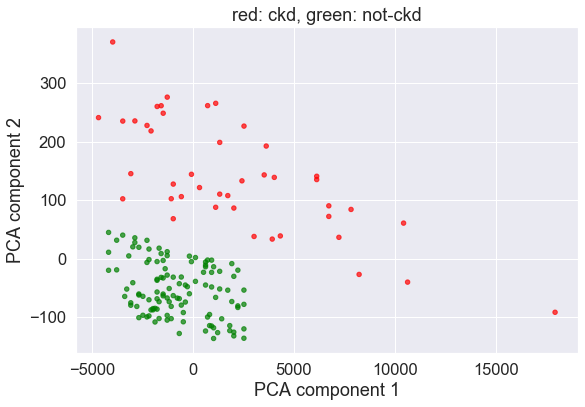

In [28]:
# plot the data
df_T.columns = ['PCA component 1', 'PCA component 2']
df_T.plot.scatter(x='PCA component 1', 
                  y='PCA component 2', 
                  figsize=(9,6),
                  marker='o',
                  alpha=0.7, # opacity
                  color=label_color,
                  title="red: ckd, green: not-ckd" )

In [29]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7
11,11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6
20,20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2


In [30]:
# Preprocessing using SciKit library
# overall performance of the PCA is dominated by ‘high variance features’.

# StandardScaler: mean=0, variance=1
# results in a numpy array
arr_scaled = preprocessing.StandardScaler().fit_transform(df)

In [31]:
# convert to data frame
df_scaled = pd.DataFrame(arr_scaled)

In [32]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.647671,-0.101098,-0.363613,-2.713365,2.273474,-0.312233,-0.221549,0.072474,0.525250,-3.730148,-0.616596,-0.865744,-1.092705,-0.569768,-0.976025
1,-2.589232,0.222253,1.431726,0.023092,0.853676,-0.312233,-0.947597,1.151950,1.633514,-3.328309,-0.270309,-1.457446,-1.423236,1.162684,-1.172850
2,-2.569753,0.868954,-0.363613,-1.801213,1.563575,-0.312233,3.841231,0.157139,0.166693,-1.051224,-0.126022,-1.004968,-1.092705,-1.275582,-1.074438
3,-2.540533,1.192305,0.534056,-1.801213,1.563575,2.154410,0.396364,0.792125,0.623038,-1.185170,0.508838,-2.814879,-2.855537,0.809777,-2.255385
4,-2.482095,0.739614,0.534056,-0.889060,0.853676,-0.312233,0.643529,2.019764,0.557846,-0.515439,0.162550,-2.083954,-1.974121,0.232293,-1.664911


In [33]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

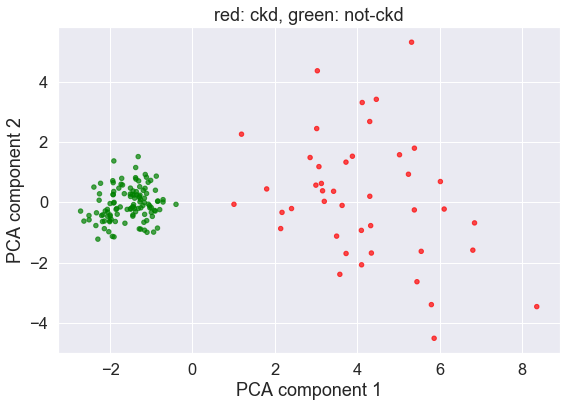

In [34]:
# transformed data
arr_T = pca.transform(df_scaled) 

# change 'T' to Pandas-DataFrame to plot using Pandas-plots
df_T = pd.DataFrame(arr_T)

# plot the data
df_T.columns = ['PCA component 1', 'PCA component 2']
df_T.plot.scatter(x='PCA component 1', 
                  y='PCA component 2', 
                  figsize=(9,6),
                  marker='o',
                  alpha=0.7, # opacity
                  color=label_color,
                  title="red: ckd, green: not-ckd" )